Parabolic fit
==============

#### Given two list of x and y coordinates, and a list of errors on y, find the parabola that minimizes the sum of distances (in the y direction) between the parabola and the(x,y) points.
<P>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
xx, yy, aa, bb, cc = symbols('xx yy aa bb cc')

In [3]:
xdata = np.array([1, 2, 3, 4, 5])
ydata = np.array([1., 2.3, 3., 3.7, 3.])
yerr = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

We want to find the parameters $a$, $b$ and $c$ of the parabola $y = c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

The minimum condition can be derived expanding $(yy - cc \cdot xx^2 - bb \cdot xx - aa)^2$, and equating the derivatives with respect to $aa$, $bb$, $cc$ to zero. 

In [4]:
s = expand((yy - cc*xx**2 - bb*xx - aa)**2)
s

aa**2 + 2*aa*bb*xx + 2*aa*cc*xx**2 - 2*aa*yy + bb**2*xx**2 + 2*bb*cc*xx**3 - 2*bb*xx*yy + cc**2*xx**4 - 2*cc*xx**2*yy + yy**2

Compute the three derivatives:

In [5]:
s_aa = diff(s,aa)
s_aa

2*aa + 2*bb*xx + 2*cc*xx**2 - 2*yy

In [6]:
s_bb = diff(s,bb)
s_bb

2*aa*xx + 2*bb*xx**2 + 2*cc*xx**3 - 2*xx*yy

In [7]:
s_cc = diff(s,cc)
s_cc

2*aa*xx**2 + 2*bb*xx**3 + 2*cc*xx**4 - 2*xx**2*yy

$a$, $b$ and $c$ are the solutions of the linear system:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2}\\
\sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2} & \sum_i \frac{x_i^4}{\sigma_i^2}\\
\end{bmatrix}$
$\begin{bmatrix} a\\b\\c \end{bmatrix}$ = 
$\begin{bmatrix} 
\sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\\\sum_i \frac{x_i^2 y_i}{\sigma_i^2}
\end{bmatrix}$

Compute numerically the entries of the left-hand-side matrix:

In [8]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_x2_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_x3_over_yerrSq = (xdata*xdata*xdata/yerrSq).sum()
sum_x4_over_yerrSq = (xdata*xdata*xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()
sum_x2y_over_yerrSq = (xdata*xdata*ydata/yerrSq).sum()

In [9]:
mat = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq,sum_x2_over_yerrSq],
                [sum_x_over_yerrSq,sum_x2_over_yerrSq,sum_x3_over_yerrSq],
                [sum_x2_over_yerrSq,sum_x3_over_yerrSq,sum_x4_over_yerrSq]])
mat

array([[  20.,   60.,  220.],
       [  60.,  220.,  900.],
       [ 220.,  900., 3916.]])

Invert the matrix:

In [10]:
mat_inv = np.linalg.inv(mat)
mat_inv

array([[ 1.15      , -0.825     ,  0.125     ],
       [-0.825     ,  0.66785714, -0.10714286],
       [ 0.125     , -0.10714286,  0.01785714]])

Check

In [11]:
np.dot(mat,mat_inv)

array([[ 1.00000000e+00,  3.66373598e-15, -9.02056208e-16],
       [-3.10862447e-15,  1.00000000e+00, -2.31759056e-15],
       [ 2.62012634e-14,  7.51620988e-14,  1.00000000e+00]])

Compute the entries of the right-hand-side vector:

In [12]:
noti = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq,sum_x2y_over_yerrSq])
noti

array([ 52. , 177.6, 685.6])

Compute $a$, $b$ and $c$:

In [13]:
np.dot(mat_inv,noti)

array([-1.02      ,  2.25428571, -0.28571429])

In [14]:
a, b, c = np.dot(mat_inv,noti)[0],np.dot(mat_inv,noti)[1],np.dot(mat_inv,noti)[2]
print(a)
print(b)
print(c)

-1.0199999999999534
2.2542857142857002
-0.2857142857142829


Plot, adding extra points for the parabola:

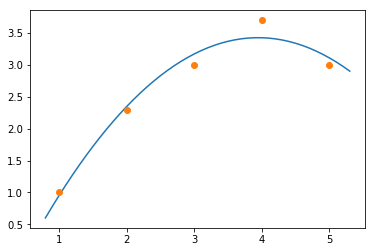

In [15]:
fig, ax = plt.subplots()
thickxdata = np.arange(0.8,5.4,0.1)
plt.plot(thickxdata,c*thickxdata*thickxdata+b*thickxdata+a,xdata,ydata,'o')